## 1. 소규모 데이터셋으로 만드는 강력한 학습 모델

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Activation, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 기존 이미지  갯수 늘리기:전처리
train_data_gen = ImageDataGenerator(rescale=1./255,            # 정규화
                                   horizontal_flip=True,       # 수평 뒤집기
                                   width_shift_range=0.1,       # 수평 이동
                                   height_shift_range=0.1,      # 수직이동
                                   fill_mode='nearest')
train_generator = train_data_gen.flow_from_directory('./data/train', target_size=(150, 150), batch_size=5, class_mode='binary')

test_data_gen = ImageDataGenerator(rescale=1./255)  # 테스트 데이터는 정규화만
test_generator = test_data_gen.flow_from_directory('./data/test', target_size=(150, 150), batch_size=5, class_mode='binary')

Found 160 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [3]:
model = Sequential()
model.add(Conv2D(32, kernel_size=3, input_shape=(150, 150, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 activation (Activation)     (None, 36, 36, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        1

In [4]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(learning_rate=0.0002), metrics=['accuracy'])

erary_stop = EarlyStopping(patience=5)

history = model.fit(train_generator, epochs=200, validation_data=test_generator, validation_steps=10, callbacks=[erary_stop])

Epoch 1/200
32/32 [==============================] - 6s 132ms/step - loss: 0.6987 - accuracy: 0.4750 - val_loss: 0.6865 - val_accuracy: 0.5400
Epoch 2/200
32/32 [==============================] - 4s 123ms/step - loss: 0.6851 - accuracy: 0.5625 - val_loss: 0.6782 - val_accuracy: 0.6200
Epoch 3/200
32/32 [==============================] - 4s 122ms/step - loss: 0.6830 - accuracy: 0.5375 - val_loss: 0.6641 - val_accuracy: 0.5800
Epoch 4/200
32/32 [==============================] - 4s 122ms/step - loss: 0.6793 - accuracy: 0.6062 - val_loss: 0.6437 - val_accuracy: 0.7200
Epoch 5/200
32/32 [==============================] - 4s 122ms/step - loss: 0.6418 - accuracy: 0.7063 - val_loss: 0.5687 - val_accuracy: 0.8400
Epoch 6/200
32/32 [==============================] - 4s 123ms/step - loss: 0.6091 - accuracy: 0.6875 - val_loss: 0.5505 - val_accuracy: 0.7000
Epoch 7/200
32/32 [==============================] - 4s 119ms/step - loss: 0.6063 - accuracy: 0.7375 - val_loss: 0.4762 - val_accuracy: 0.8600

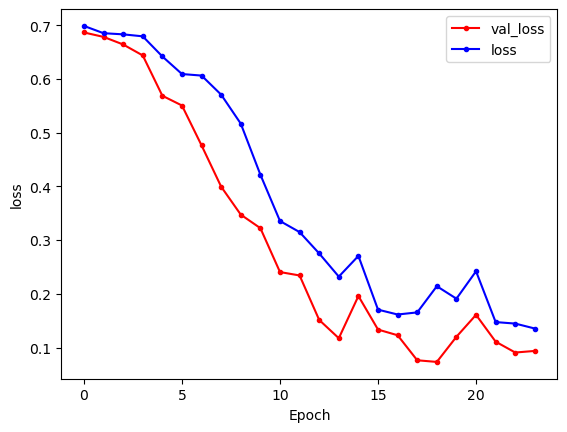

In [5]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_num = np.arange(len(y_vloss))

plt.plot(x_num, y_vloss, marker='.', c='red', label='val_loss')
plt.plot(x_num, y_loss, marker='.', c='blue', label='loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='best')
plt.show()

## 2. 전이학습으로 모델 성능 극대화하기

In [13]:
from tensorflow.keras import optimizers
from tensorflow.keras.applications import VGG16, InceptionV3
from tensorflow.keras import optimizers, Input, models, metrics

In [14]:
# transfer_model = VGG16(input_shape=(150, 150, 3), include_top=False)
transfer_model = InceptionV3(input_shape=(150, 150, 3), include_top=False)
transfer_model.trainable = False
transfer_model.summary()

87910968/87910968 [==============================] - 5s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_3 (Conv2D)              (None, 74, 74, 32)   864         ['input_2[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d_3[0][0]']               
 alization)                                                                                       
                      

 rmalization)                                                                                     
                                                                                                  
 batch_normalization_10 (BatchN  (None, 16, 16, 96)  288         ['conv2d_13[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 16, 16, 32)  96          ['conv2d_14[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_6 (Activation)      (None, 16, 16, 64)   0           ['batch_normalization_5[0][0]']  
                                                                                                  
 activatio

 activation_23 (Activation)     (None, 16, 16, 64)   0           ['batch_normalization_22[0][0]'] 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 16, 16, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_26 (Conv2D)             (None, 16, 16, 96)   55296       ['activation_23[0][0]']          
                                                                                                  
 batch_normalization_20 (BatchN  (None, 16, 16, 48)  144         ['conv2d_23[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_23 (BatchN  (None, 16, 16, 96)  288         ['conv2d_26[0][0]']              
 ormalizat

                                                                  'activation_30[0][0]',          
                                                                  'max_pooling2d_5[0][0]']        
                                                                                                  
 conv2d_37 (Conv2D)             (None, 7, 7, 128)    98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 7, 7, 128)   384         ['conv2d_37[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_35 (Activation)     (None, 7, 7, 128)    0           ['batch_normalization_34[0][0]'] 
                                                                                                  
 conv2d_38

 batch_normalization_44 (BatchN  (None, 7, 7, 160)   480         ['conv2d_47[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_45 (Activation)     (None, 7, 7, 160)    0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_48 (Conv2D)             (None, 7, 7, 160)    179200      ['activation_45[0][0]']          
                                                                                                  
 batch_normalization_45 (BatchN  (None, 7, 7, 160)   480         ['conv2d_48[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

 conv2d_58 (Conv2D)             (None, 7, 7, 160)    179200      ['activation_55[0][0]']          
                                                                                                  
 batch_normalization_55 (BatchN  (None, 7, 7, 160)   480         ['conv2d_58[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_56 (Activation)     (None, 7, 7, 160)    0           ['batch_normalization_55[0][0]'] 
                                                                                                  
 conv2d_54 (Conv2D)             (None, 7, 7, 160)    122880      ['mixed5[0][0]']                 
                                                                                                  
 conv2d_59 (Conv2D)             (None, 7, 7, 160)    179200      ['activation_56[0][0]']          
          

 activation_66 (Activation)     (None, 7, 7, 192)    0           ['batch_normalization_65[0][0]'] 
                                                                                                  
 conv2d_64 (Conv2D)             (None, 7, 7, 192)    147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_69 (Conv2D)             (None, 7, 7, 192)    258048      ['activation_66[0][0]']          
                                                                                                  
 batch_normalization_61 (BatchN  (None, 7, 7, 192)   576         ['conv2d_64[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_66 (BatchN  (None, 7, 7, 192)   576         ['conv2d_69[0][0]']              
 ormalizat

                                                                                                  
 batch_normalization_70 (BatchN  (None, 7, 7, 192)   576         ['conv2d_73[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 7, 7, 192)   576         ['conv2d_77[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_71 (Activation)     (None, 7, 7, 192)    0           ['batch_normalization_70[0][0]'] 
                                                                                                  
 activation_75 (Activation)     (None, 7, 7, 192)    0           ['batch_normalization_74[0][0]'] 
          

                                                                                                  
 activation_80 (Activation)     (None, 3, 3, 384)    0           ['batch_normalization_79[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 3, 3, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_84 (Activation)     (None, 3, 3, 384)    0           ['batch_normalization_83[0][0]'] 
                                                                                                  
 batch_normalization_84 (BatchN  (None, 3, 3, 192)   576         ['conv2d_87[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

                                                                                                  
 batch_normalization_93 (BatchN  (None, 3, 3, 192)   576         ['conv2d_96[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_86 (Activation)     (None, 3, 3, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 (Concatenate)         (None, 3, 3, 768)    0           ['activation_88[0][0]',          
                                                                  'activation_89[0][0]']          
                                                                                                  
 concatenate_1 (Concatenate)    (None, 3, 3, 768)    0           ['activation_92[0][0]',          
          

In [17]:
model = Sequential()
model.add(transfer_model)
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 3, 3, 2048)        21802784  
                                                                 
 flatten_3 (Flatten)         (None, 18432)             0         
                                                                 
 dense_6 (Dense)             (None, 64)                1179712   
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 22,982,561
Trainable params: 1,179,777
Non-trainable params: 21,802,784
_________________________________________________________________


In [18]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(learning_rate=0.0002), metrics=['accuracy'])
earl_stop = EarlyStopping(patience=5)
history = model.fit(train_generator, epochs=200, validation_data=test_generator, validation_steps=10, callbacks=[earl_stop])

Epoch 1/200
32/32 [==============================] - 12s 222ms/step - loss: 0.8800 - accuracy: 0.7625 - val_loss: 0.2788 - val_accuracy: 0.8600
Epoch 2/200
32/32 [==============================] - 6s 182ms/step - loss: 0.4266 - accuracy: 0.8875 - val_loss: 0.2524 - val_accuracy: 0.9000
Epoch 3/200
32/32 [==============================] - 6s 181ms/step - loss: 0.3044 - accuracy: 0.9062 - val_loss: 0.2208 - val_accuracy: 0.9400
Epoch 4/200
32/32 [==============================] - 6s 181ms/step - loss: 0.2594 - accuracy: 0.9000 - val_loss: 0.1763 - val_accuracy: 0.9400
Epoch 5/200
32/32 [==============================] - 6s 185ms/step - loss: 0.2082 - accuracy: 0.9375 - val_loss: 0.1153 - val_accuracy: 0.9600
Epoch 6/200
32/32 [==============================] - 6s 177ms/step - loss: 0.2503 - accuracy: 0.9000 - val_loss: 0.0970 - val_accuracy: 0.9600
Epoch 7/200
32/32 [==============================] - 6s 178ms/step - loss: 0.2080 - accuracy: 0.8938 - val_loss: 0.1927 - val_accuracy: 0.920

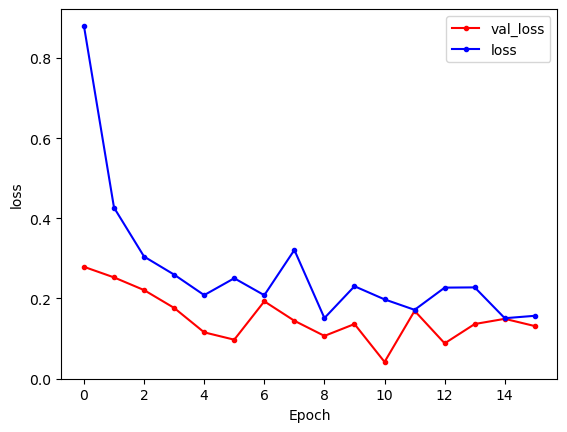

In [19]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_num = np.arange(len(y_vloss))

plt.plot(x_num, y_vloss, marker='.', c='red', label='val_loss')
plt.plot(x_num, y_loss, marker='.', c='blue', label='loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='best')
plt.show()